# Линейные алгоритмы классификации

$y(x_1, \ldots, x_n) = sign(w_1x_1 + w_2x_2 + \ldots + w_n x_n)$

$<w, x> = w_1x_1 + w_2x_2 + \ldots + w_n x_n$, где $w = (w_1, \ldots, w_n)$, а $x = (x_1, \ldots, x_n)$.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Логистическая регрессия

Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу. 

Метод основан на минимизации логистической функции потерь:

$$L(y_{true}, y_{predicted}) = \sum_{i=1}^n \ln (1 + e^{-y_{true} \cdot y_{predicted}}) \rightarrow \min_w,$$
где $y_{predicted}$ вычисляется по формуле $y_{predicted} = <w, x>$. Минимизация функции потерь происходит методом градиентного спуска.

Создадим два кластера с данными для решения задачи классификации.

In [9]:
from sklearn.datasets import make_blobs

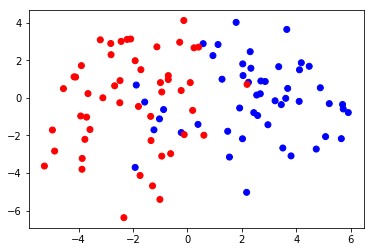

In [10]:
colors = ("red", "blue")
X, y = make_blobs(n_samples=100, centers=[[-2,0], [2,0]], random_state=20, cluster_std=2)

colored_y = np.zeros(y.size, dtype=str)
for i in range(2):
    colored_y[y == i] = colors[i]
    
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

Обучим логистическую регрессию.

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression()
model.fit(X, y)

C:\Users\Yury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Визуализируем предсказания.

In [13]:
x_min, x_max = -12, 12
y_min, y_max = -10, 10
h = 0.05
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

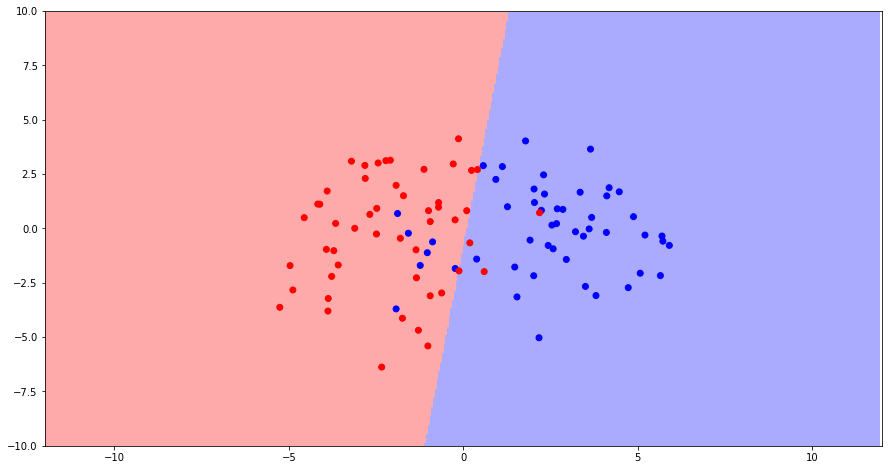

In [18]:
plt.figure(figsize=(15,8))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

In [22]:
y_pred = model.predict_proba(X)[:, 1]

In [26]:
df = pd.DataFrame({'y_pred': y_pred, 'y_true': y})
df.head()

,y_pred,y_true
0,0.045292,0
1,0.943969,1
2,0.998338,1
3,0.910335,1
4,0.969613,1


In [30]:
df.sort_values(by=['y_pred'], ascending=False)

,y_pred,y_true
23,0.998766,1
63,0.998636,1
16,0.998438,1
2,0.998338,1
21,0.997336,1
95,0.997097,1
24,0.996419,1
27,0.995276,1
84,0.991257,1
58,0.990333,1


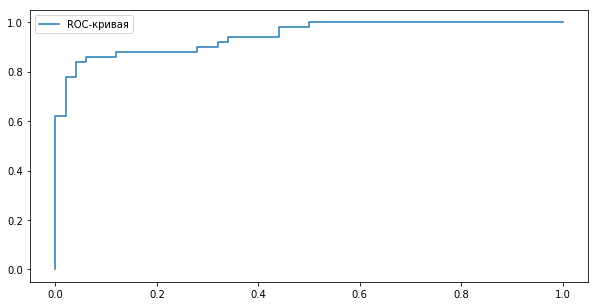

In [24]:
fpr, tpr, _ = roc_curve(y, y_pred)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='ROC-кривая')
plt.legend()

## Применение логистической регрессии для предсказания отклика на маркетинговую кампанию

In [31]:
# Считаем данные
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [32]:
pd.set_option('display.max_columns', None)

In [33]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [35]:
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                   'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [36]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Визуализируем данные с помощью 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B2BC14A58>,
      dtype=object)

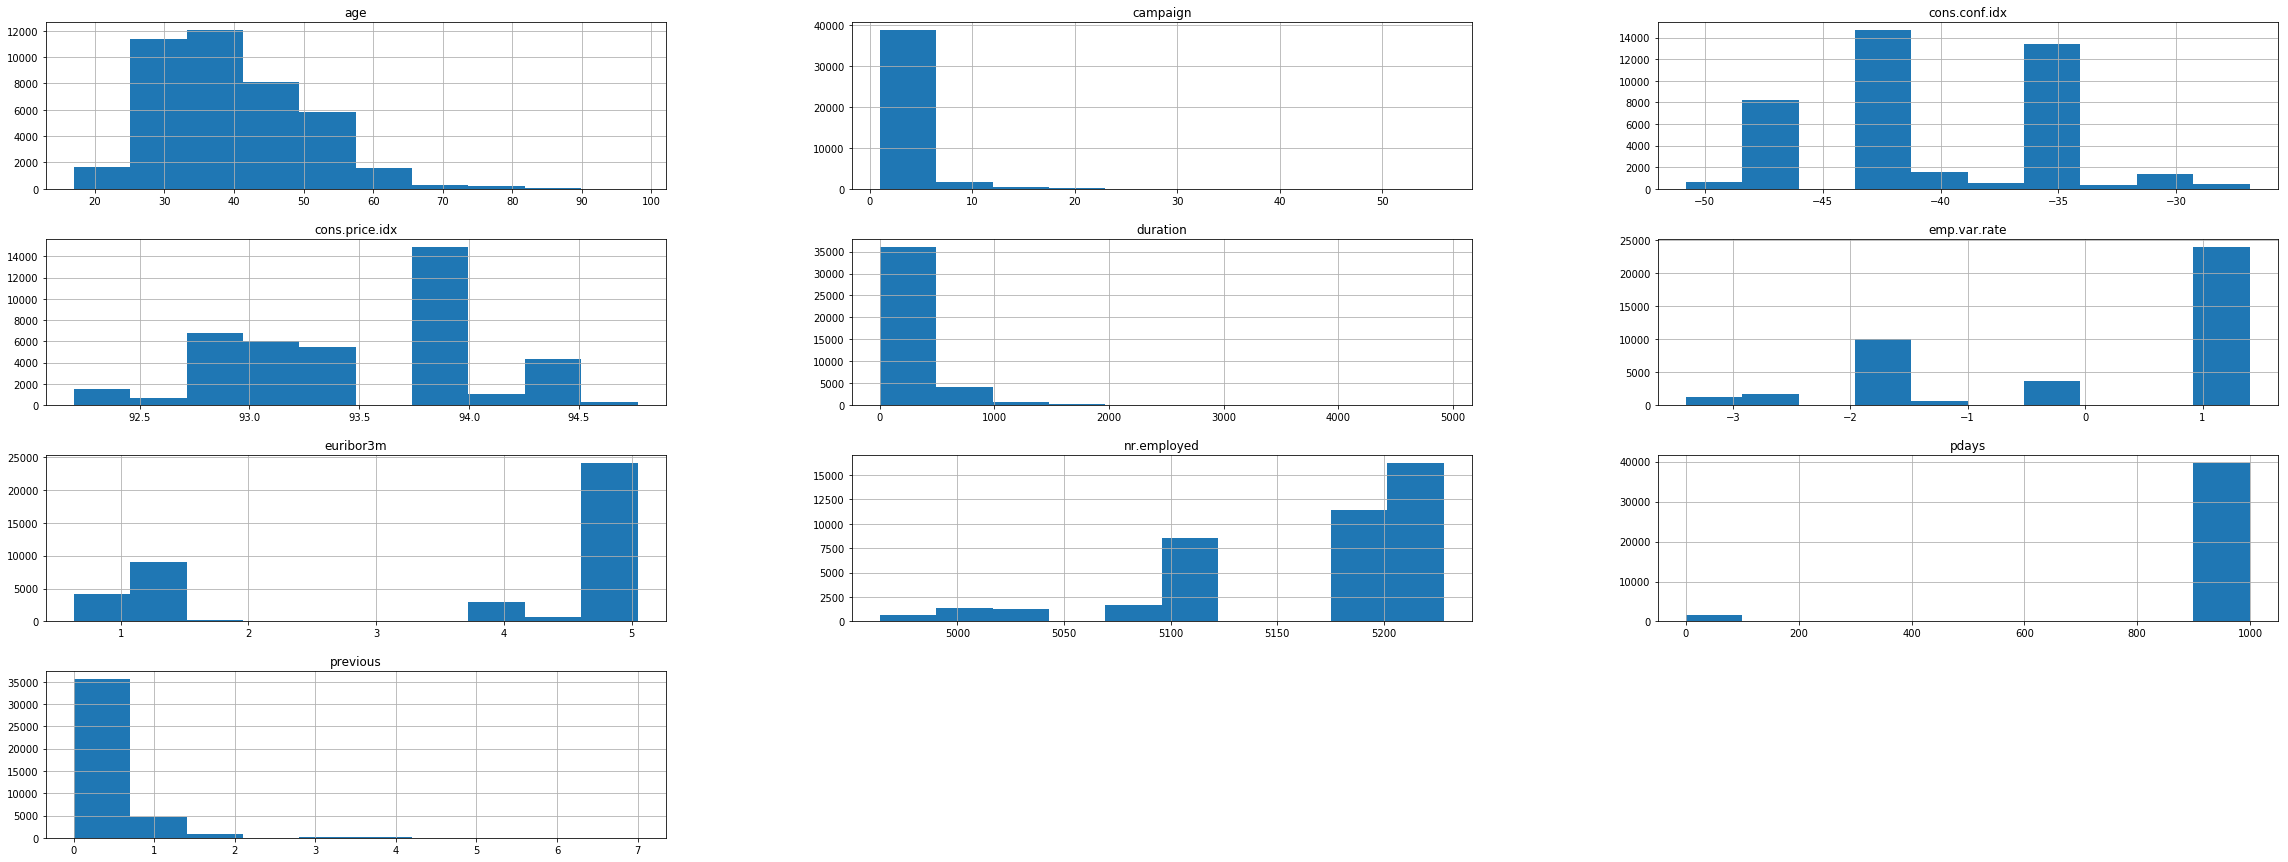

In [37]:
data.hist(figsize=(40,15))

In [38]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# Бинаризуем таргет
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y).ravel()

In [39]:
X.shape

(41188, 20)

Классы очень несбалансированы:

In [40]:
y.mean()

0.11265417111780131

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является One-hot encoding. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$ и 0 иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [41]:
X = pd.get_dummies(X)

# Обратите внимание на признаки
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
age                              41188 non-null int64
duration                         41188 non-null int64
campaign                         41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed

Разобьем выборку на трейн и тест

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучим логистическую регрессию. Из-за несбалансированности классов порог нужно выставлять в зависимости от целей кампании.

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_predicted = model.predict_proba(X_test)[:, 1]

C:\Users\Yury\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Визуализируем веса обученной модели:

<BarContainer object of 63 artists>

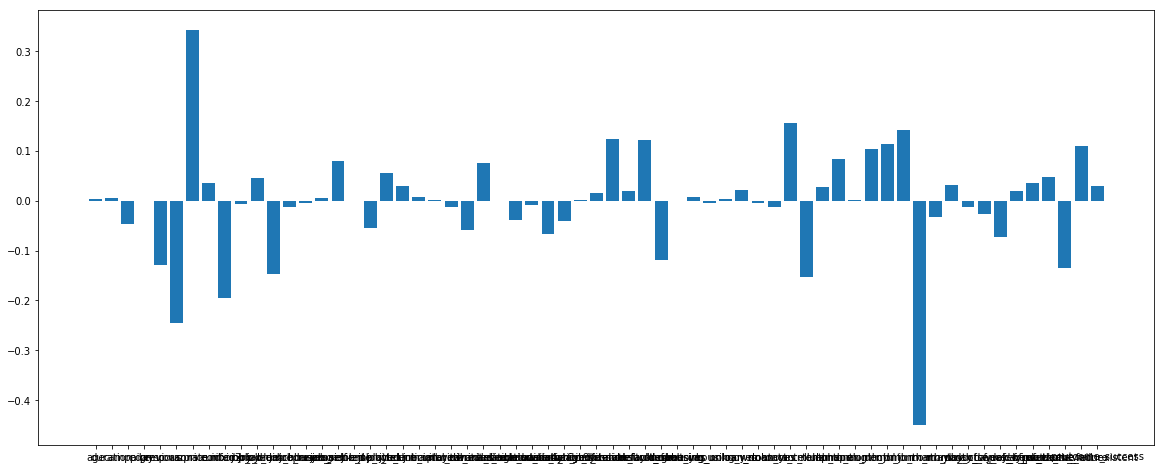

In [45]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_[0])

In [50]:
X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [51]:
model.coef_[0]

array([ 3.82292610e-03,  4.50548148e-03, -4.75202723e-02, -1.56152126e-03,
       -1.28727960e-01, -2.45942601e-01,  3.42421040e-01,  3.60422392e-02,
       -1.96010386e-01, -6.32107667e-03,  4.54764261e-02, -1.46359808e-01,
       -1.25149987e-02, -4.55534816e-03,  5.17812384e-03,  7.90871108e-02,
       -1.30364792e-03, -5.39281245e-02,  5.61720595e-02,  2.88112496e-02,
        6.55693347e-03,  4.25050037e-04, -1.18137148e-02, -5.94261690e-02,
        7.53090466e-02, -1.02413621e-03, -3.91260392e-02, -9.62252509e-03,
       -6.74759174e-02, -4.02590648e-02,  1.84675298e-03,  1.56149046e-02,
        1.23506704e-01,  1.85602113e-02,  1.22100345e-01, -1.18991824e-01,
       -6.34950806e-05,  6.24334475e-03, -5.45080607e-03,  2.25248794e-03,
        2.19257351e-02, -5.45080607e-03, -1.34299024e-02,  1.55534258e-01,
       -1.52489231e-01,  2.73089673e-02,  8.28953552e-02,  1.16977364e-03,
        1.02980314e-01,  1.12950566e-01,  1.40918361e-01, -4.50015668e-01,
       -3.36753270e-02,  

In [46]:
pd.DataFrame(data={'name': X.columns, 'coef': model.coef_[0]})

,name,coef
0,age,0.003823
1,duration,0.004505
2,campaign,-0.047520
3,pdays,-0.001562
4,previous,-0.128728
5,emp.var.rate,-0.245943
6,cons.price.idx,0.342421
7,cons.conf.idx,0.036042
8,euribor3m,-0.196010
9,nr.employed,-0.006321


Оценим качество предсказания.

In [47]:
print('Test ROC-AUC: ', roc_auc_score(y_test, y_predicted))

Test ROC-AUC:  0.9311361364091897


In [48]:
fpr, tpr, _ = roc_curve(y_test, y_predicted)

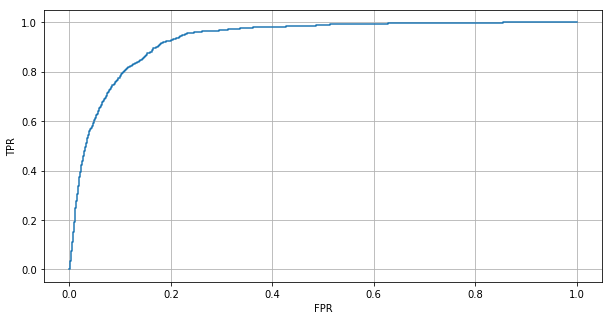

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

### Задача
Каждый клиент, решивший приобрести продукт, приносит прибыль 100 рублей. При этом один звонок стоит 10 рублей. Определите границу вероятности согласия для выбора клиентов для продвижения, чтобы кампания принесла максимальную прибыль.

10% клиентов откликаются на кампанию, 90% не откликаются.
Прибыль в точке (0.1, 0.8) вычисляется по формуле:

$(N \cdot y \cdot 0.11) \cdot 100 - (N \cdot (y \cdot 0.11 + x \cdot 0.89)) \cdot 10$

In [53]:
x = 0.1
y = 0.8

N = 1000

In [54]:
(N * y * 0.11) * 100 - (N * (y * 0.11 + x * 0.89)) * 10

7030.0

In [55]:
outcome = (N * tpr * 0.11) * 100 - (N * (tpr * 0.11 + fpr * 0.89)) * 10

In [56]:
outcome

array([   0.        ,   10.73752711,   32.21258134, ..., 2284.84749202,
       2295.58501914, 1000.        ])

In [57]:
np.argmax(outcome)

858

In [58]:
outcome[858]

7462.337769770949

In [60]:
tpr[858], fpr[858]

(0.9175704989154013, 0.18220338983050846)